In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('./data/cleaned_data_marathon_all_participants.csv', index_col=0)
df.head()

,bib_number,half_1st,half_second,time_total_netto,time_total_brutto,5km,10km,15km,20km,25km,30km,35km,40km,last_name,first_name
0,8,01:11:17,01:13:25,02:24:41,02:24:43,00:16:35,00:33:02,00:49:34,01:07:26,01:24:27,01:42:37,01:59:26,02:16:58,W.,J.
1,2802,01:12:41,01:14:47,02:27:28,02:27:29,00:16:53,00:33:43,00:50:45,01:08:51,01:25:45,01:44:22,02:01:21,02:19:29,G.,M.
2,616,01:12:44,01:17:20,02:30:04,02:30:06,00:16:24,00:33:02,00:49:34,01:08:44,01:26:15,01:45:41,02:03:04,02:21:58,B.,M.
3,62,01:14:20,01:15:45,02:30:04,02:30:06,00:16:52,00:34:02,00:51:39,01:10:22,01:27:41,01:46:17,02:03:20,02:21:58,A.,G.
4,298,01:15:42,01:18:31,02:34:13,02:34:13,00:17:00,00:34:24,00:52:28,01:11:47,01:29:31,01:48:49,02:07:36,02:26:22,M.,L.


In [83]:
df.shape

(19441, 15)

In [84]:
df = df.replace(['–'], [np.nan])

In [85]:
df[df['time_total_netto'].isna() & df['time_total_brutto'].notna()]

,bib_number,half_1st,half_second,time_total_netto,time_total_brutto,5km,10km,15km,20km,25km,30km,35km,40km,last_name,first_name
17146,19029,NaN,NaN,NaN,07:31:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S.,A.
17186,19030,NaN,NaN,NaN,07:31:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V.,J.
17189,5259,NaN,01:55:52,NaN,03:25:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M.,A.
17198,4955,NaN,NaN,NaN,04:04:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F.,F.
17223,5163,NaN,01:47:47,NaN,03:31:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P.,V.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19287,18210,NaN,01:27:51,NaN,02:55:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B.,J.
19297,9005,NaN,01:33:58,NaN,03:16:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B.,G.
19304,8862,NaN,NaN,NaN,05:26:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D.,D.
19305,16125,NaN,02:06:48,NaN,04:07:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F.,C.


Parmi eux, certains sont BOOSTER, pour aider les participants à parcourir leurs derniers kilomètres.

In [86]:
finishers = df.dropna()
finishers.head()

,bib_number,half_1st,half_second,time_total_netto,time_total_brutto,5km,10km,15km,20km,25km,30km,35km,40km,last_name,first_name
0,8,01:11:17,01:13:25,02:24:41,02:24:43,00:16:35,00:33:02,00:49:34,01:07:26,01:24:27,01:42:37,01:59:26,02:16:58,W.,J.
1,2802,01:12:41,01:14:47,02:27:28,02:27:29,00:16:53,00:33:43,00:50:45,01:08:51,01:25:45,01:44:22,02:01:21,02:19:29,G.,M.
2,616,01:12:44,01:17:20,02:30:04,02:30:06,00:16:24,00:33:02,00:49:34,01:08:44,01:26:15,01:45:41,02:03:04,02:21:58,B.,M.
3,62,01:14:20,01:15:45,02:30:04,02:30:06,00:16:52,00:34:02,00:51:39,01:10:22,01:27:41,01:46:17,02:03:20,02:21:58,A.,G.
4,298,01:15:42,01:18:31,02:34:13,02:34:13,00:17:00,00:34:24,00:52:28,01:11:47,01:29:31,01:48:49,02:07:36,02:26:22,M.,L.


In [87]:
cols = ['half_1st', 'half_second', 'time_total_netto','time_total_brutto', '5km', '10km', '15km', '20km', '25km', '30km','35km', '40km']
for col in cols:
    finishers.loc[:,col] = pd.to_datetime(finishers.loc[:,col], format='%H:%M:%S', errors='coerce').apply(lambda x: int(x.strftime('%S'))+60*int(x.strftime('%M'))+3600*int(x.strftime('%H')))


In [88]:
bins = [3600*j for i in [[0] , np.arange(3,8.5,0.5)] for j in i]
labels = ["<3h","<3h30","<4h", "<4h30", "<5h", "<5h30", "<6h", "<6h30", "<7h", "<7h30", "<8h"]
finishers.loc[:,'grade_time'] = pd.cut(finishers.loc[:,'time_total_netto'], bins=bins, labels=labels)
finishers.head()


C:\Users\dcons\AppData\Local\Temp\ipykernel_10592\1690479203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finishers.loc[:,'grade_time'] = pd.cut(finishers.loc[:,'time_total_netto'], bins=bins, labels=labels)


,bib_number,half_1st,half_second,time_total_netto,time_total_brutto,5km,10km,15km,20km,25km,30km,35km,40km,last_name,first_name,grade_time
0,8,4277,4405,8681,8683,995,1982,2974,4046,5067,6157,7166,8218,W.,J.,<3h
1,2802,4361,4487,8848,8849,1013,2023,3045,4131,5145,6262,7281,8369,G.,M.,<3h
2,616,4364,4640,9004,9006,984,1982,2974,4124,5175,6341,7384,8518,B.,M.,<3h
3,62,4460,4545,9004,9006,1012,2042,3099,4222,5261,6377,7400,8518,A.,G.,<3h
4,298,4542,4711,9253,9253,1020,2064,3148,4307,5371,6529,7656,8782,M.,L.,<3h


In [100]:
finishers.to_csv('./data/finishers.csv')

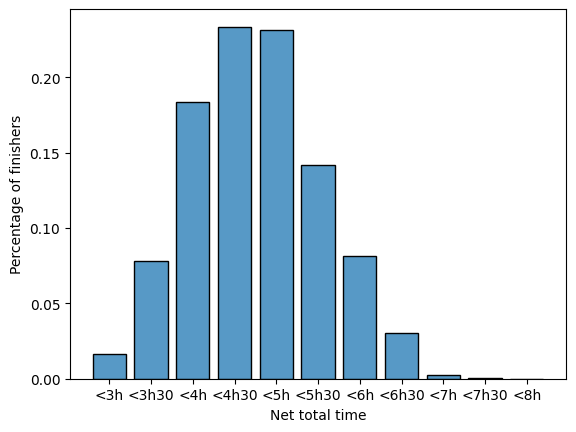

In [89]:
ax = sns.histplot(x = finishers['grade_time'], multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)
ax.set_xlabel('Net total time');
ax.set_ylabel('Percentage of finishers');

Courir en Negative Split = courir la deuxième moitié de course plus rapidement que la première

In [90]:
finishers.loc[:,'negative_split'] = int([finishers['half_second'] < finishers['half_1st']] == True)

C:\Users\dcons\AppData\Local\Temp\ipykernel_10592\1182508729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finishers.loc[:,'negative_split'] = int([finishers['half_second'] < finishers['half_1st']] == True)


In [91]:
finishers['negative_split'].value_counts()

negative_split
0    16982
Name: count, dtype: int64

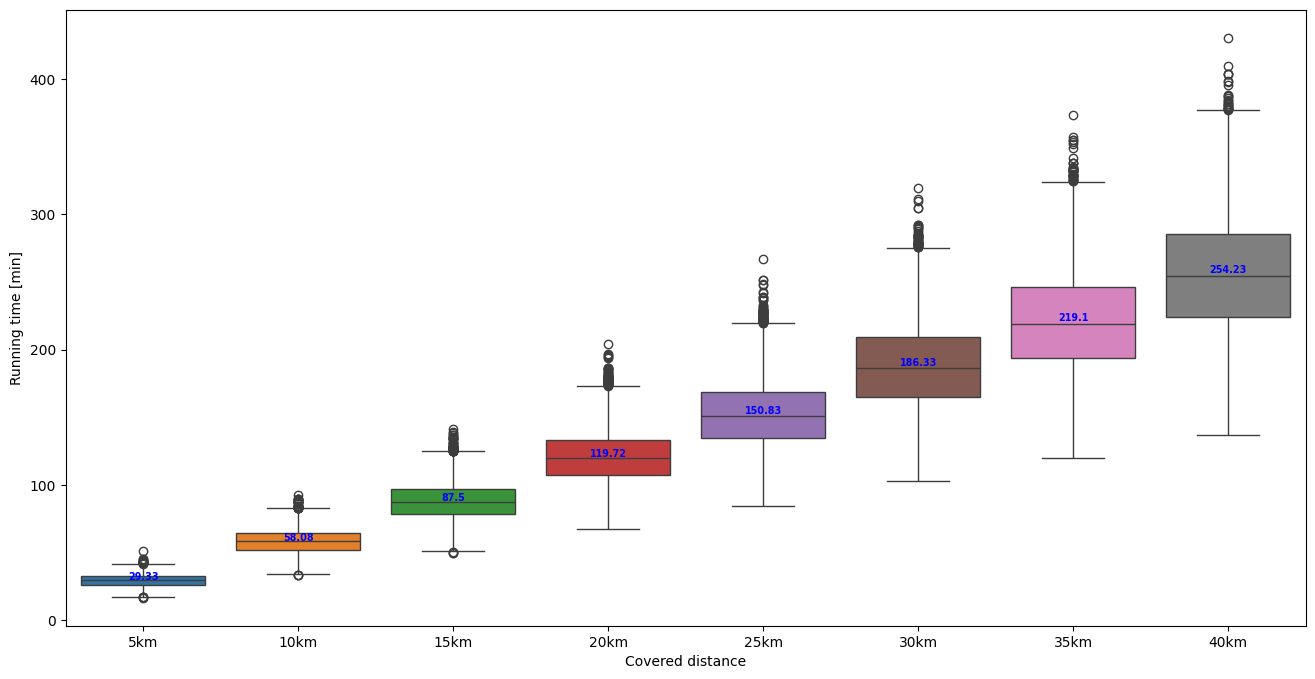

In [92]:
plt.figure(figsize=(16,8))
fig = sns.boxplot(finishers.iloc[:,5:13]/60)
plt.xlabel('Covered distance');
plt.ylabel('Running time [min]');

medians = finishers.iloc[:,5:13].median()/60
offset_vert = medians * 0.01
for xtick in fig.get_xticks():
    fig.text(xtick,medians.iloc[xtick] + offset_vert.iloc[xtick],np.round(medians.iloc[xtick],2), horizontalalignment='center',size='x-small',color='b',weight='semibold')


In [93]:
time_by_5 = pd.DataFrame(index=finishers.index)
time_by_5['bib_number'] = finishers['bib_number']
time_by_5['5km']=finishers.iloc[:,5]
for i in np.arange(6,13):
    time_by_5[finishers.columns[i]] = finishers.iloc[:,i] - finishers.iloc[:,i-1]
time_by_5.to_csv('./data/times_cutoff_5km.csv')
time_by_5

,bib_number,5km,10km,15km,20km,25km,30km,35km,40km
0,8,995,987,992,1072,1021,1090,1009,1052
1,2802,1013,1010,1022,1086,1014,1117,1019,1088
2,616,984,998,992,1150,1051,1166,1043,1134
3,62,1012,1030,1057,1123,1039,1116,1023,1118
4,298,1020,1044,1084,1159,1064,1158,1127,1126
...,...,...,...,...,...,...,...,...,...
17102,5917,2060,2474,2752,4511,3277,3220,3014,2944
17103,17864,1665,1651,1882,2856,3067,4589,4558,3987
17104,19742,2028,2039,2245,2858,3138,3623,4337,3990
17105,5407,2292,3060,2999,3405,3121,3392,3039,3305


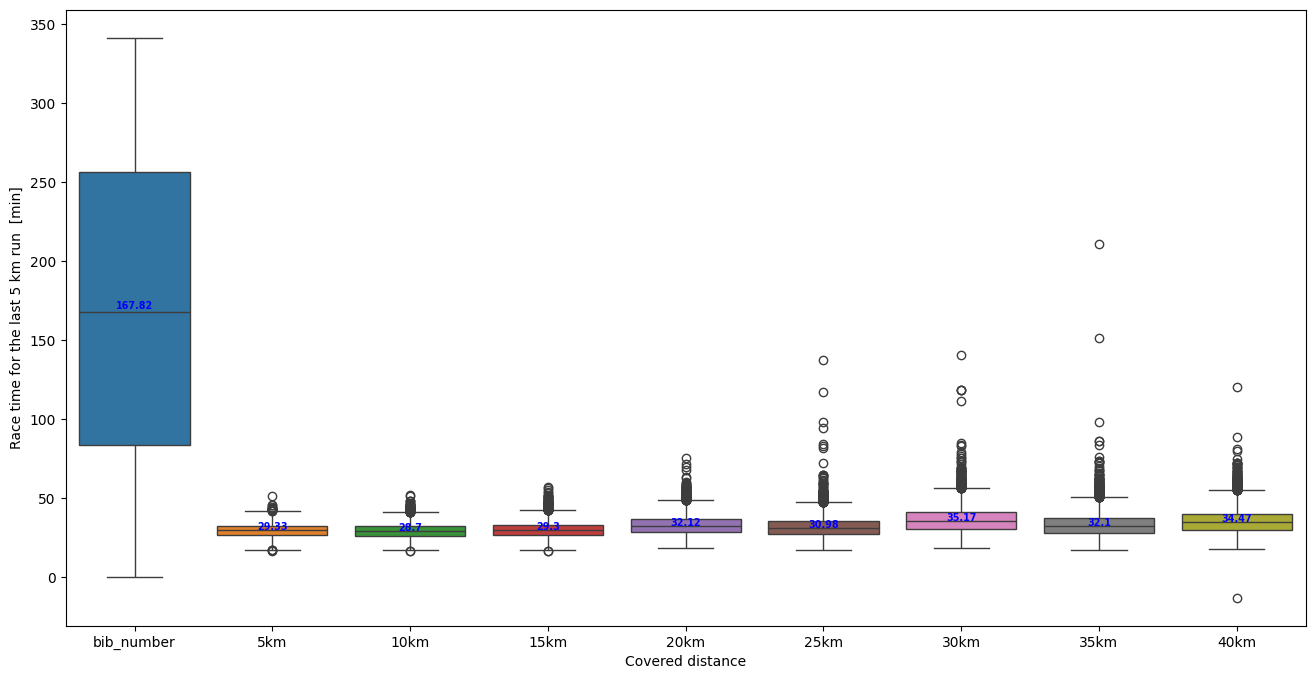

In [94]:
plt.figure(figsize=(16,8))
fig = sns.boxplot(time_by_5/60)
plt.xlabel('Covered distance');
plt.ylabel('Race time for the last 5 km run  [min]');

medians = time_by_5.median()/60
offset_vert = medians * 0.01
for xtick in fig.get_xticks():
    fig.text(xtick,medians.iloc[xtick] + offset_vert.iloc[xtick],np.round(medians.iloc[xtick],2), horizontalalignment='center',size='x-small',color='b',weight='semibold')

In [115]:
def rank_participant(bib_number):
    return finishers[finishers['bib_number']==bib_number].index.array[0] + 1

In [117]:
rank_participant(13440)

17107

In [95]:
def boxplot_participant(bib_number):
    plt.figure(figsize=(16,8))
    fig = sns.boxplot(time_by_5.iloc[:,1:]/60)
    plt.xlabel('Covered distance');
    plt.ylabel('Race time for the last 5 km run  [min]');

    medians = time_by_5.iloc[:,1:].median()/60
    offset_vert = medians * 0.01
    cpt = 0
    for xtick in fig.get_xticks():
        fig.text(xtick,medians.iloc[xtick] + offset_vert.iloc[xtick],np.round(medians.iloc[xtick],2), horizontalalignment='center',size='x-small',color='b',weight='semibold')
        cpt += 1
        if cpt==1:
            fig.plot(xtick,time_by_5[time_by_5['bib_number']==bib_number].iloc[:,xtick+1]/60, 'ro', label= f'Bib number: {bib_number}')
        else:
            fig.plot(xtick,time_by_5[time_by_5['bib_number']==bib_number].iloc[:,xtick+1]/60, 'ro')
    plt.legend();

        

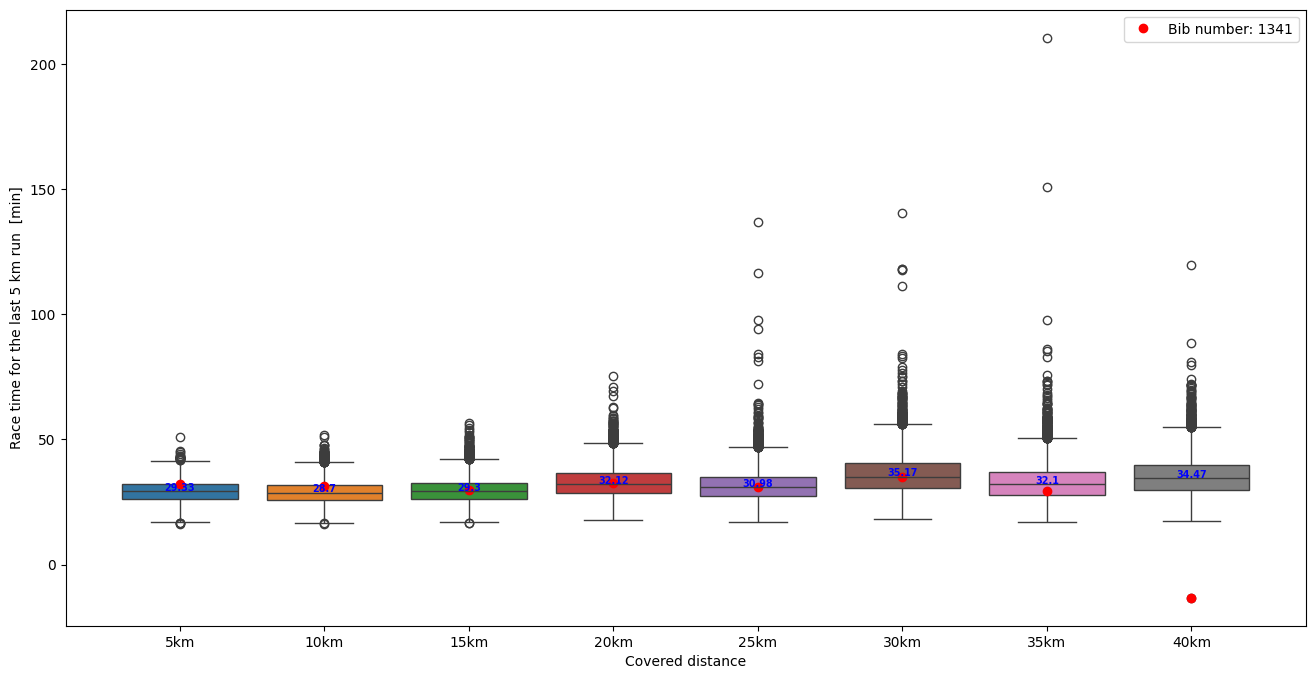

In [96]:
boxplot_participant(1341)

In [97]:
time_by_5['10km'].min()

972

In [98]:
time_by_5[time_by_5['10km']==972]

,bib_number,5km,10km,15km,20km,25km,30km,35km,40km
187,53,1005,972,1035,1117,1378,1596,1722,1307


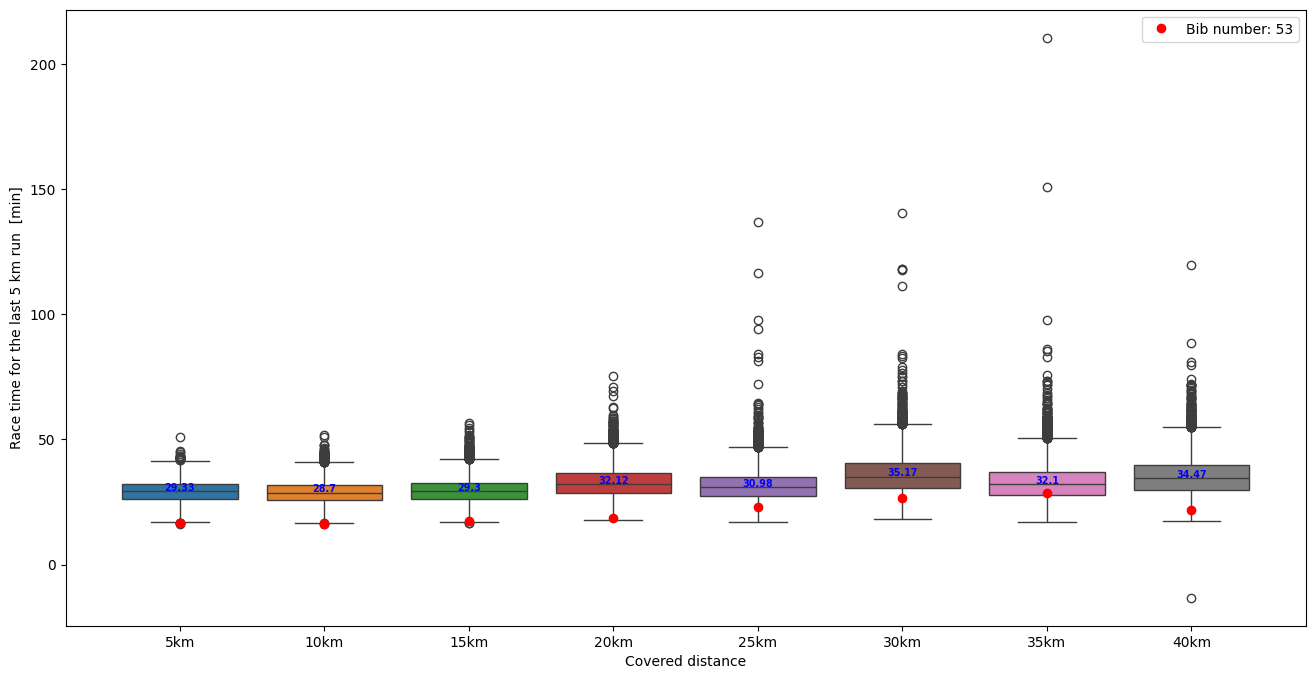

In [99]:
boxplot_participant(53)